## Crop Yield Prediction Using Machine Learning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
crop_df=pd.read_excel("ISB_crop_data.xlsx")

In [4]:
rain_df=pd.read_excel("Annual_rainfall_IMD.xlsx")

In [5]:
soil_df=pd.read_excel("soil_data.xlsx")

In [6]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148171 entries, 0 to 148170
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               148171 non-null  int64  
 1   year             148171 non-null  object 
 2   state_name       148171 non-null  object 
 3   state_code       148171 non-null  int64  
 4   district_name    148171 non-null  object 
 5   district_code    148171 non-null  int64  
 6   season           148171 non-null  object 
 7   crop_code        148171 non-null  int64  
 8   crop_name        148171 non-null  object 
 9   crop_type        148171 non-null  object 
 10  area             148171 non-null  float64
 11  area_unit        148171 non-null  object 
 12  production       148171 non-null  float64
 13  production_unit  148171 non-null  object 
 14  yield            148171 non-null  float64
 15  yield_unit       148171 non-null  object 
dtypes: float64(3), int64(4), object(9)
mem

In [7]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             313 non-null    int64  
 1   State            313 non-null    object 
 2   Annual_Rainfall  313 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


In [8]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      29 non-null     object
 1   Soil_type  29 non-null     object
dtypes: object(2)
memory usage: 596.0+ bytes


In [9]:
crop_df.sample(10)

,id,year,state_name,state_code,district_name,district_code,season,crop_code,crop_name,crop_type,area,area_unit,production,production_unit,yield,yield_unit
99490,182566,2018-19,Andhra Pradesh,28,Visakhapatanam,520,Rabi,1010,Niger Seed,Oilseeds,5793.0,Hectare,1842.0,Tonnes,0.32,Tonnes/Hectare
30906,92085,2012-13,Gujarat,24,Banas Kantha,441,Rabi,201,Gram,Pulses,200.0,Hectare,200.0,Tonnes,1.00,Tonnes/Hectare
95595,165495,2016-17,Telangana,36,Mahabubnagar,512,Kharif,708,Onion,Vegetable,69.0,Hectare,1030.0,Tonnes,14.93,Tonnes/Hectare
58788,123476,2014-15,Gujarat,24,Aravalli,672,Kharif,1002,Castor Seed,Oilseeds,21800.0,Hectare,35035.0,Tonnes,1.61,Tonnes/Hectare
29924,91046,2012-13,Chhattisgarh,22,Bilaspur,375,Whole Year,509,Coriander,Spices,243.0,Hectare,66.0,Tonnes,0.27,Tonnes/Hectare
79955,147799,2015-16,Tamil Nadu,33,Tirunelveli,592,Kharif,708,Onion,Vegetable,2138.0,Hectare,26019.0,Tonnes,12.17,Tonnes/Hectare
33620,95037,2012-13,Karnataka,29,Ramanagara,631,Whole Year,504,Turmeric,Spices,8.0,Hectare,38.0,Tonnes,4.75,Tonnes/Hectare
3403,61031,2010-11,Gujarat,24,Junagadh,448,Whole Year,502,Dry Chillies,Spices,300.0,Hectare,300.0,Tonnes,1.00,Tonnes/Hectare
114212,199282,2018-19,Uttar Pradesh,9,Banda,128,Kharif,703,Sweet Potato,Vegetable,14.0,Hectare,161.0,Tonnes,11.50,Tonnes/Hectare
140917,229043,2019-20,Meghalaya,17,East Garo Hills,273,Rabi,619,Cashewnut,Fruits,232.0,Hectare,289.0,Tonnes,1.25,Tonnes/Hectare


In [10]:
crop_df=crop_df.drop(columns=["id","state_code","district_code","crop_code","crop_type","area_unit","production_unit","yield_unit"])

In [11]:
crop_df.head()

,year,state_name,district_name,season,crop_name,area,production,yield
0,2010-11,Andhra Pradesh,Anantapur,Whole Year,Arecanut,409.0,182.0,0.44
1,2010-11,Andhra Pradesh,Krishna,Whole Year,Arecanut,9.0,4.0,0.44
2,2010-11,Andhra Pradesh,West Godavari,Whole Year,Arecanut,20.0,9.0,0.45
3,2010-11,Telangana,Adilabad,Kharif,Arhar/Tur,47884.0,26193.0,0.55
4,2010-11,Telangana,Adilabad,Rabi,Arhar/Tur,1648.0,901.0,0.55


In [12]:
crop_df['year'] = crop_df['year'].str.strip()                   
crop_df['year'] = crop_df['year'].str.extract(r'(\d{4})')[0]     
crop_df['year'] = pd.to_numeric(crop_df['year'], errors='coerce')  

In [13]:
crop_df.head()

,year,state_name,district_name,season,crop_name,area,production,yield
0,2010,Andhra Pradesh,Anantapur,Whole Year,Arecanut,409.0,182.0,0.44
1,2010,Andhra Pradesh,Krishna,Whole Year,Arecanut,9.0,4.0,0.44
2,2010,Andhra Pradesh,West Godavari,Whole Year,Arecanut,20.0,9.0,0.45
3,2010,Telangana,Adilabad,Kharif,Arhar/Tur,47884.0,26193.0,0.55
4,2010,Telangana,Adilabad,Rabi,Arhar/Tur,1648.0,901.0,0.55


In [14]:
crop_df.duplicated().sum()

0

In [19]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148171 entries, 0 to 148170
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           148171 non-null  int64  
 1   state_name     148171 non-null  object 
 2   district_name  148171 non-null  object 
 3   season         148171 non-null  object 
 4   crop_name      148171 non-null  object 
 5   area           148171 non-null  float64
 6   production     148171 non-null  float64
 7   yield          148171 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ MB


In [20]:
# Standardize column names to lowercase
crop_df.columns = crop_df.columns.str.lower()
rain_df.columns = rain_df.columns.str.lower()
soil_df.columns =soil_df.columns.str.lower()

In [21]:
crop_df.tail()

,year,state_name,district_name,season,crop_name,area,production,yield
148166,2019,West Bengal,Murshidabad,Rabi,Wheat,52709.0,136454.0,2.59
148167,2019,West Bengal,Nadia,Rabi,Wheat,6188.0,16748.0,2.71
148168,2019,West Bengal,Paschim Bardhaman,Rabi,Wheat,929.0,3946.0,4.25
148169,2019,West Bengal,Purba Bardhaman,Rabi,Wheat,1832.0,5678.0,3.10
148170,2019,West Bengal,Purulia,Rabi,Wheat,516.0,931.0,1.80


In [22]:
crop_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2017, 2019],
      dtype=int64)

In [23]:
rain_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [24]:
rain_df.head()

,year,state,annual_rainfall
0,2010,Assam,2578.5
1,2010,Andhra Pradesh,1297.0
2,2010,Karnataka,1317.7
3,2010,Kerala,3131.8
4,2010,Meghalaya,3119.7


In [25]:
crop_df = crop_df.rename(columns={'state_name':'state'})

In [26]:
crop_df['state'].unique()

array(['Andhra Pradesh', 'Telangana', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [27]:
rain_df['state'].unique()

array(['Assam', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Meghalaya',
       'Tamil Nadu', 'Goa', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Mizoram', 'Nagaland', 'Punjab', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand', 'West Bengal',
       'Telangana', 'Arunachal Pradesh', 'Odisha', 'Delhi', 'Sikkim'],
      dtype=object)

In [28]:
crop_df['state'].nunique()

29

In [29]:
rain_df['state'].nunique()

29

In [30]:
print(crop_df.shape)
print(rain_df.shape)

(148171, 8)
(313, 3)


In [31]:
merged_df = pd.merge(crop_df, rain_df, on=['year', 'state'], how='left')

In [32]:
merged_df.head()

,year,state,district_name,season,crop_name,area,production,yield,annual_rainfall
0,2010,Andhra Pradesh,Anantapur,Whole Year,Arecanut,409.0,182.0,0.44,1297.0
1,2010,Andhra Pradesh,Krishna,Whole Year,Arecanut,9.0,4.0,0.44,1297.0
2,2010,Andhra Pradesh,West Godavari,Whole Year,Arecanut,20.0,9.0,0.45,1297.0
3,2010,Telangana,Adilabad,Kharif,Arhar/Tur,47884.0,26193.0,0.55,NaN
4,2010,Telangana,Adilabad,Rabi,Arhar/Tur,1648.0,901.0,0.55,NaN


In [33]:
merged_df.duplicated().sum()

0

In [34]:
merged_df.shape

(164321, 9)

In [35]:
merged_df.isnull().sum()

year                  0
state                 0
district_name         0
season                0
crop_name             0
area                  0
production            0
yield                 0
annual_rainfall    2362
dtype: int64

In [36]:
merged_df[merged_df.isnull().any(axis=1)]

,year,state,district_name,season,crop_name,area,production,yield,annual_rainfall
3,2010,Telangana,Adilabad,Kharif,Arhar/Tur,47884.0,26193.0,0.55,NaN
4,2010,Telangana,Adilabad,Rabi,Arhar/Tur,1648.0,901.0,0.55,NaN
22,2010,Telangana,Mahabubnagar,Kharif,Arhar/Tur,124059.0,50492.0,0.41,NaN
23,2010,Telangana,Mahabubnagar,Rabi,Arhar/Tur,208.0,85.0,0.41,NaN
43,2010,Telangana,Adilabad,Rabi,Bajra,1555.0,1127.0,0.72,NaN
...,...,...,...,...,...,...,...,...,...
141106,2019,Jammu And Kashmir,Rajauri,Rabi,Wheat,45422.0,70860.0,1.56,NaN
141107,2019,Jammu And Kashmir,Ramban,Rabi,Wheat,4794.0,6409.0,1.34,NaN
141108,2019,Jammu And Kashmir,Reasi,Rabi,Wheat,15064.0,28825.0,1.91,NaN
141109,2019,Jammu And Kashmir,Samba,Rabi,Wheat,22853.0,48507.0,2.12,NaN


In [37]:
null_value=(merged_df.isnull().sum() / len(merged_df)) * 100
null_value

year               0.00000
state              0.00000
district_name      0.00000
season             0.00000
crop_name          0.00000
area               0.00000
production         0.00000
yield              0.00000
annual_rainfall    1.43743
dtype: float64

In [38]:
merged_df.dropna(inplace=True)

In [39]:
merged_df.isnull().sum()

year               0
state              0
district_name      0
season             0
crop_name          0
area               0
production         0
yield              0
annual_rainfall    0
dtype: int64

In [40]:
soil_df["soil_type"].unique()

array(['Red and Yellow', 'Alluvial', 'Black', 'laterite', 'alluvial',
       'Red', 'Desert', 'Mountain', 'Loamy'], dtype=object)

In [41]:
df = pd.merge(merged_df,soil_df, on='state', how='left')

In [42]:
df.head()

,year,state,district_name,season,crop_name,area,production,yield,annual_rainfall,soil_type
0,2010,Andhra Pradesh,Anantapur,Whole Year,Arecanut,409.0,182.0,0.44,1297.0,Red and Yellow
1,2010,Andhra Pradesh,Krishna,Whole Year,Arecanut,9.0,4.0,0.44,1297.0,Red and Yellow
2,2010,Andhra Pradesh,West Godavari,Whole Year,Arecanut,20.0,9.0,0.45,1297.0,Red and Yellow
3,2010,Andhra Pradesh,Anantapur,Kharif,Arhar/Tur,66013.0,11156.0,0.17,1297.0,Red and Yellow
4,2010,Andhra Pradesh,Chittoor,Kharif,Arhar/Tur,10943.0,1182.0,0.11,1297.0,Red and Yellow


In [43]:
df.shape

(161959, 10)

In [44]:
df.isnull().sum()

year               0
state              0
district_name      0
season             0
crop_name          0
area               0
production         0
yield              0
annual_rainfall    0
soil_type          0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161959 entries, 0 to 161958
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             161959 non-null  int64  
 1   state            161959 non-null  object 
 2   district_name    161959 non-null  object 
 3   season           161959 non-null  object 
 4   crop_name        161959 non-null  object 
 5   area             161959 non-null  float64
 6   production       161959 non-null  float64
 7   yield            161959 non-null  float64
 8   annual_rainfall  161959 non-null  float64
 9   soil_type        161959 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 12.4+ MB


In [47]:
df['year'] = pd.to_numeric(df['year']).astype('int32')

In [48]:
for col in ['area', 'production', 'yield', 'annual_rainfall']:
    df[col] = pd.to_numeric(df[col]).astype('float32')

In [51]:
crop = df.groupby('crop_name')[['production']].sum()
crop_prod = crop.sort_values(by = ['production'], ascending = False).head(10)
crop_prod

,production
crop_name,
Sugarcane,3.945540e+09
Rice,1.242861e+09
Wheat,1.056431e+09
Potato,3.826355e+08
Cotton(Lint),2.982681e+08
Maize,2.715348e+08
Banana,1.395172e+08
Soyabean,1.142332e+08
Jute,1.102004e+08


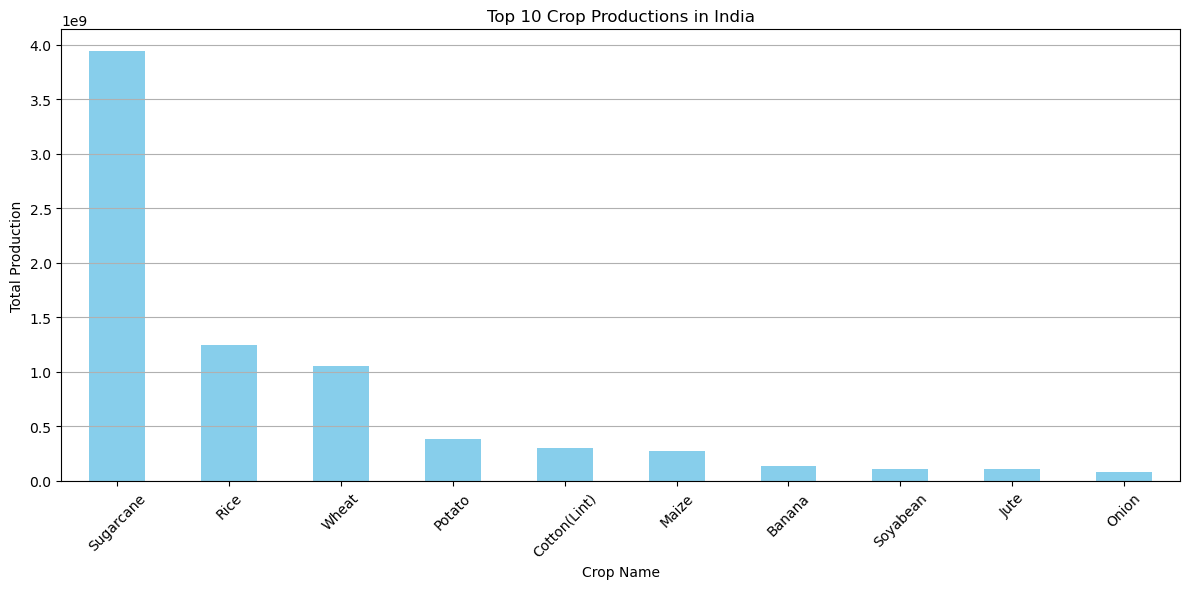

In [61]:
# Group by crop_name and sum the production
top_crops = df.groupby('crop_name')['production'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_crops.plot(kind='bar', color='skyblue')
plt.title('Top 10 Crop Productions in India')
plt.xlabel('Crop Name')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [70]:
statewise_top_crop = df.groupby(['state', 'crop_name'])['production'].sum().reset_index()
statewise_top_crop = statewise_top_crop.loc[statewise_top_crop.groupby('state')['production'].idxmax()]
statewise_top_crop['production'] = statewise_top_crop['production'].apply(lambda x: f"{x/1e6:.2f} million tonnes")

statewise_top_crop[['state', 'crop_name', 'production']]


,state,crop_name,production
32,Andhra Pradesh,Sugarcane,108.18 million tonnes
50,Arunachal Pradesh,Rice,2.25 million tonnes
79,Assam,Rice,56.69 million tonnes
118,Bihar,Sugarcane,139.00 million tonnes
152,Chhattisgarh,Rice,79.21 million tonnes
171,Goa,Rice,1.22 million tonnes
196,Gujarat,Sugarcane,122.19 million tonnes
233,Haryana,Wheat,130.32 million tonnes
246,Himachal Pradesh,Maize,7.08 million tonnes
282,Jharkhand,Rice,22.77 million tonnes


In [53]:
df["season"].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [54]:
# Strip extra spaces from the 'season' column
df['season'] = df['season'].str.strip()


In [55]:
df['season'] = df['season'].replace({
    'Kharif': 'Monsoon',
    'Rabi': 'Winter'
})

In [56]:
df["season"].unique()

array(['Whole Year', 'Monsoon', 'Winter', 'Autumn', 'Summer'],
      dtype=object)

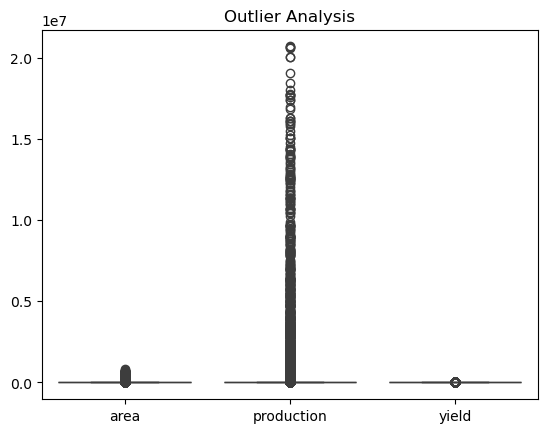

In [57]:
sns.boxplot(data=df[['area', 'production', 'yield']])
plt.title('Outlier Analysis')
plt.show()


                area  production     yield
area        1.000000    0.901958 -0.073508
production  0.901958    1.000000  0.063572
yield      -0.073508    0.063572  1.000000


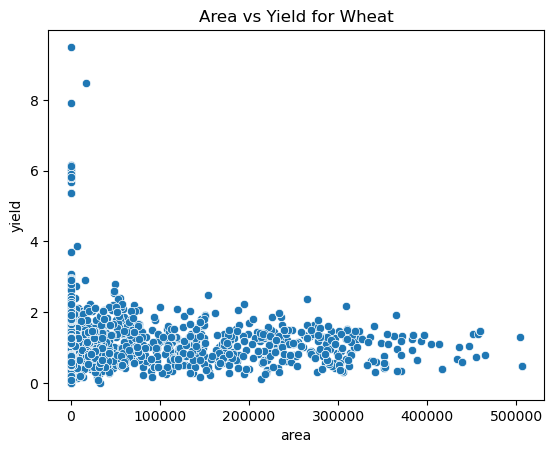

In [59]:
crop_data = df[df['crop_name'] == 'Soyabean']  
print(crop_data[['area', 'production', 'yield']].corr())
sns.scatterplot(x='area', y='yield', data=crop_data)
plt.title('Area vs Yield for Wheat')
plt.show()


soil_type
laterite          8.439232
Red and Yellow    5.620730
alluvial          5.547250
Alluvial          5.490912
Black             4.899379
Red               3.914412
Mountain          1.202584
Name: yield, dtype: float32


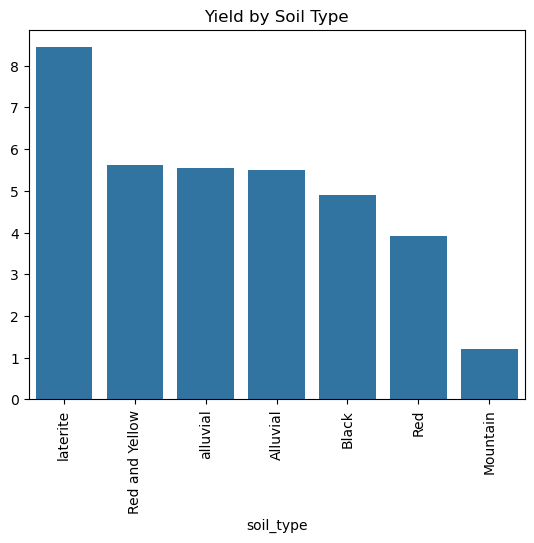

In [186]:
soil_summary = df.groupby('soil_type')['yield'].mean().sort_values(ascending=False)
print(soil_summary)
sns.barplot(x=soil_summary.index, y=soil_summary.values)
plt.title('Yield by Soil Type')
plt.xticks(rotation=90)
plt.show()


                           area     production     yield
state                                                   
Andhra Pradesh     14301.520508   59823.589844  8.009057
Arunachal Pradesh   1030.053589    1942.534668  3.321239
Assam               4048.211426   11284.688477  4.084236
Bihar               7946.008301   35119.105469  4.532162
Chhattisgarh        6453.202148   10391.283203  2.042686
Goa                 5558.562988   12851.676758  8.950171
Gujarat            14167.476562   55959.746094  5.712605
Haryana            16223.750000   79632.804688  7.926451
Himachal Pradesh    3134.238281    6552.328125  2.312205
Jharkhand           5861.873047    9809.498047  2.433312
Karnataka           8691.524414   46869.773438  4.897280
Kerala              3027.211182   20175.142578  8.439232
Madhya Pradesh     18196.373047   41207.078125  5.030620
Maharashtra        30671.746094  149418.156250  3.802907
Manipur             2042.570312    7765.013184  6.683290
Meghalaya            981.813232

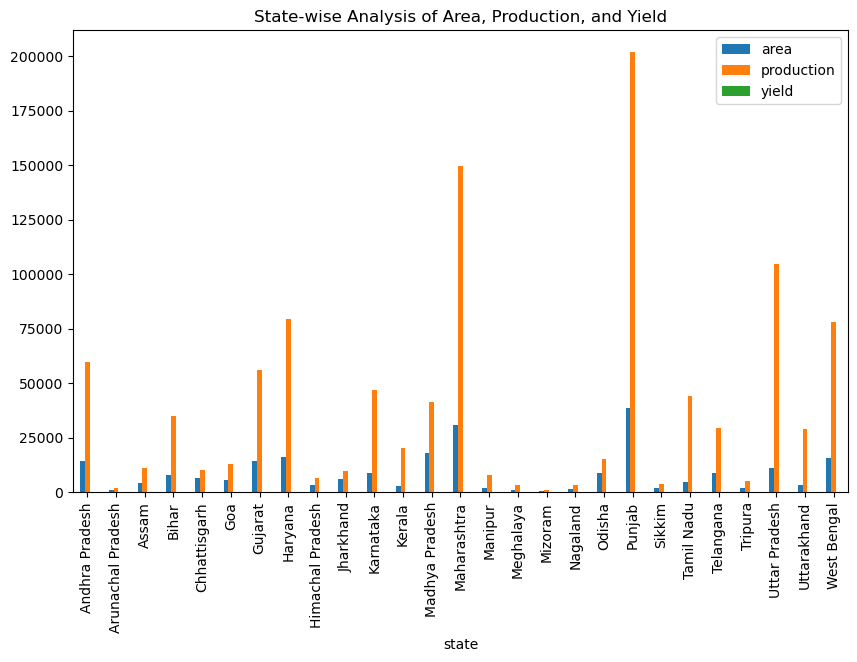

In [187]:
state_summary = df.groupby('state')[['area', 'production', 'yield']].mean()
print(state_summary)
state_summary.plot(kind='bar', figsize=(10, 6), title='State-wise Analysis of Area, Production, and Yield')
plt.show()


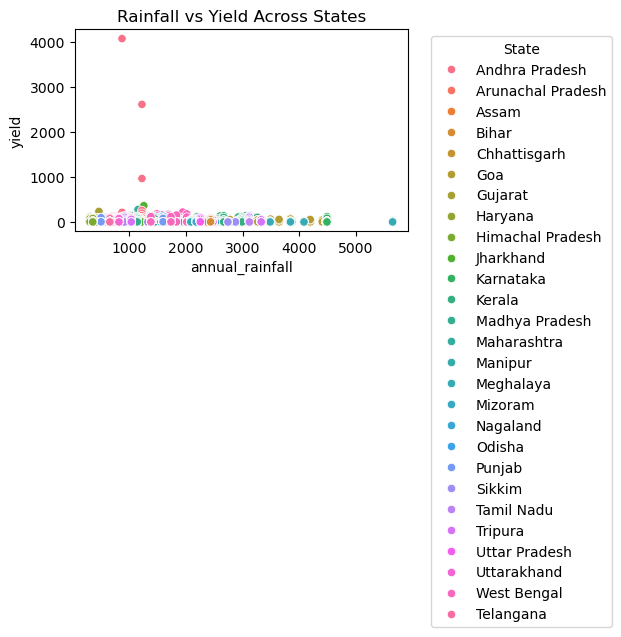

In [188]:

sns.scatterplot(x='annual_rainfall', y='yield', hue='state', data=df)
plt.title('Rainfall vs Yield Across States')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the side
plt.tight_layout()  
plt.show()

In [189]:
#sns.pairplot(df[['area', 'production', 'yield', 'annual_rainfall']], kind='scatter')
#plt.show()


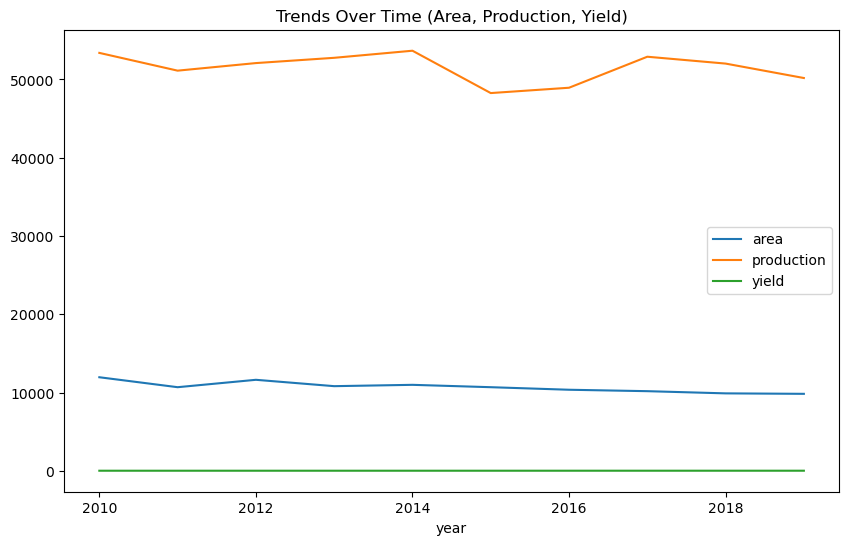

In [190]:
time_data = df.groupby('year')[['area', 'production', 'yield']].mean()
time_data.plot(kind='line', figsize=(10, 6), title='Trends Over Time (Area, Production, Yield)')
plt.show()


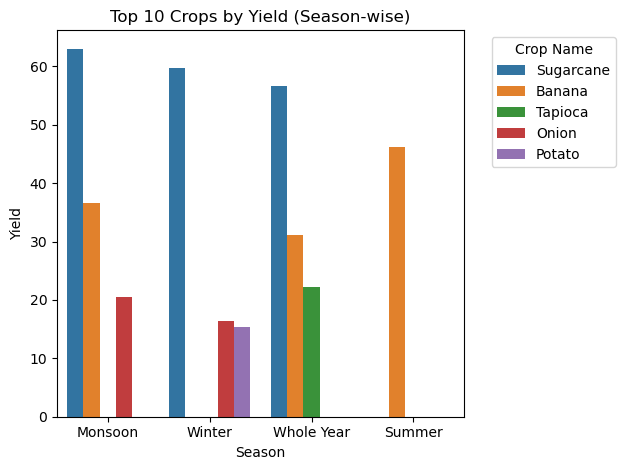

In [191]:
season_data = df.groupby(['season', 'crop_name'])['yield'].mean().reset_index()

# Sorting by yield to find the top 10 crops across all seasons
top_crops = season_data.sort_values(by='yield', ascending=False).head(10)

# Visualizing the top 10 crops with the highest yield using a bar plot
sns.barplot(x='season', y='yield', hue='crop_name', data=top_crops)
plt.title('Top 10 Crops by Yield (Season-wise)')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.legend(title='Crop Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

                    area     production
season                                 
Autumn       6376.990234   11470.388672
Monsoon     13142.613281   54032.011719
Summer       4353.754883   11376.366211
Whole Year   2585.804443  102576.625000
Winter      13027.499023   37757.929688


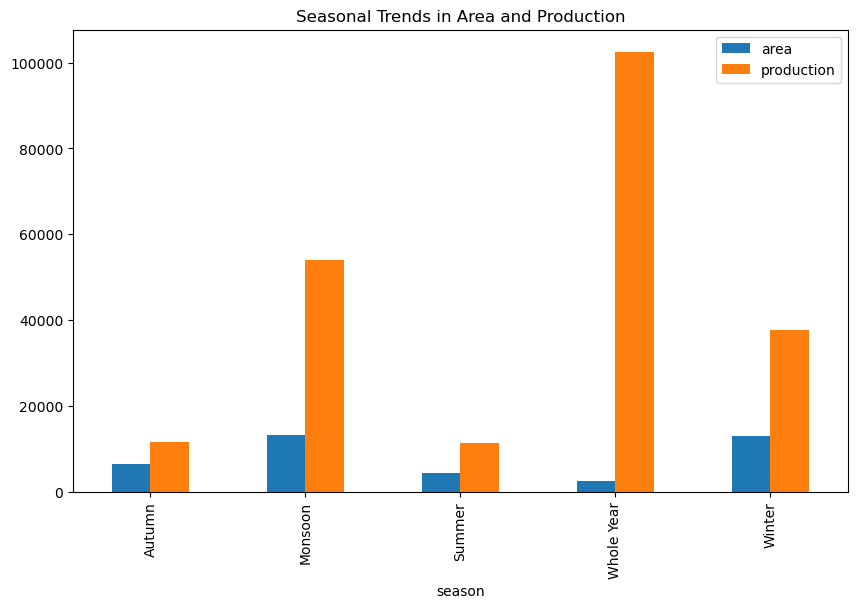

In [192]:
season_summary = df.groupby('season')[['area', 'production']].mean()
print(season_summary)
season_summary.plot(kind='bar', figsize=(10, 6), title='Seasonal Trends in Area and Production')
plt.show()


In [73]:

season_summary = df.groupby('season').agg(
    total_crops=('crop_name', 'nunique'),   
    total_production=('production', 'sum')  
).reset_index()
season_summary = season_summary.sort_values('total_production', ascending=False)

season_summary['total_production'] = (season_summary['total_production'] / 1e6).round(2).astype(str) + ' million tonnes'

print(season_summary)


       season  total_crops        total_production
1     Monsoon           45  3447.57 million tonnes
3  Whole Year           36  2575.29 million tonnes
4      Winter           44  2096.24 million tonnes
2      Summer           20   154.41 million tonnes
0      Autumn           10    45.38 million tonnes


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2856\2467551619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_production', data=season_summary, palette='viridis')


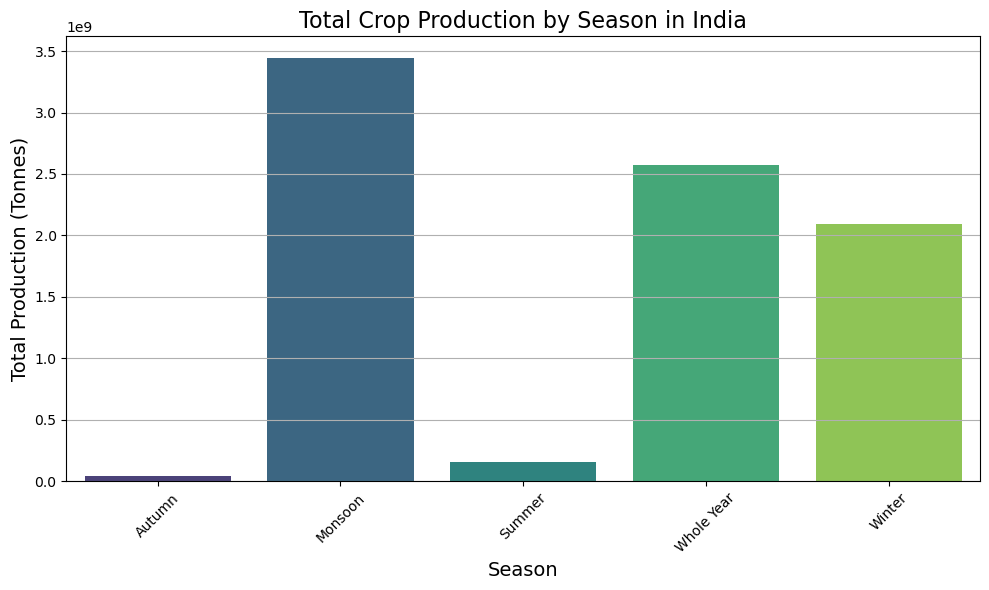

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns





plt.figure(figsize=(10,6))
sns.barplot(x='season', y='total_production', data=season_summary, palette='viridis')

plt.title('Total Crop Production by Season in India', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Production (Tonnes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Modell Building

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pickle


In [72]:
X = df.drop(['yield', 'production'], axis=1)
y = df['yield']


In [195]:
# Label Encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Random Forest Regressor

In [198]:
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [199]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_r2_score = r2_score(y_test, y_pred)
print(f"Random Forest R2 Score: {rf_r2_score:.4f}")


Random Forest R2 Score: 0.7881


## 2. Decision Tree Regressor

In [196]:
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [197]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_r2_score = r2_score(y_test, y_pred)
print(f"Decision Tree R2 Score: {dt_r2_score:.4f}")

Decision Tree R2 Score: 0.8645


## 3. Gradient Boosting Regressor

In [201]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
# Train the model
gb_model.fit(X_train, y_train)



GradientBoostingRegressor(random_state=42)

In [202]:
# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_r2_score = r2_score(y_test, y_pred)
print(f"Gradient Boosting R2 Score: {gb_r2_score:.4f}")


Gradient Boosting R2 Score: 0.7714


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20420\3428144183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette='viridis')


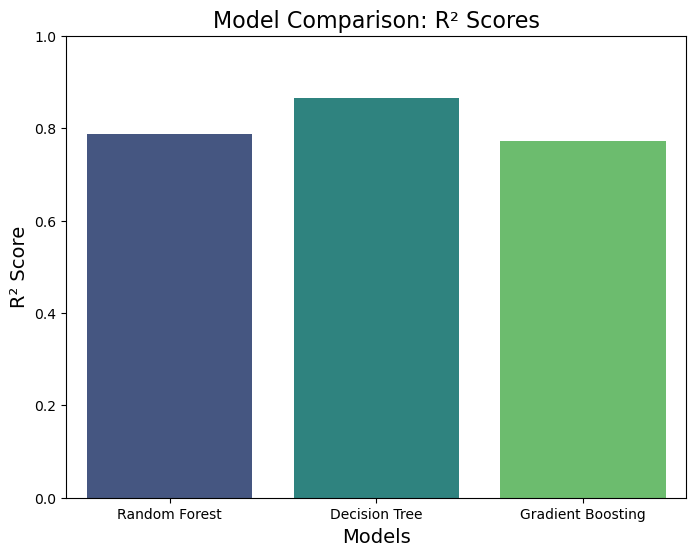

In [205]:
r2_scores = {
    'Random Forest': rf_r2_score,  
    'Decision Tree': dt_r2_score,   
    'Gradient Boosting':gb_r2_score  
}

# Plotting the R² scores comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette='viridis')
plt.title('Model Comparison: R² Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(0, 1)  
plt.show()

In [206]:
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)
